# 1.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/google colab/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 2.) Select four columns to use as features (one just be trans_date_trans)

In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [6]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

# 3.) Create a your own variable out of trans_date. Create dummies for factor vars

In [ ]:
type(df_select["trans_date_trans_time"][0])

str

In [7]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

<ipython-input-7-99f721e4ce0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])


In [ ]:
dir(df_select["trans_date_trans_time"][0])

['__add__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_date_repr',
 '_freq',
 '_freqstr',
 '_repr_base',
 '_round',
 '_set_freq',
 '_short_repr',
 '_time_repr',
 'asm8',
 'astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'fold',
 'freq',
 'freqstr',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_

In [8]:
df_select["time_var"] = [i.day_of_week for i in df_select["trans_date_trans_time"]]

<ipython-input-8-9949fa3625ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.day_of_week for i in df_select["trans_date_trans_time"]]


In [16]:
# assign the weekend value 1 and the rest of the week as zero
df_select['time_var'] = df_select['time_var'].apply(lambda time: 0 if time <5 else 1 )

<ipython-input-16-6243cb40e10a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_var'] = df_select['time_var'].apply(lambda time: 0 if time <5 else 1 )


In [17]:
df_select.head(3)

,trans_date_trans_time,category,amt,city_pop,is_fraud,time_var
0,2020-06-21 12:14:25,personal_care,2.86,333497,0,1
1,2020-06-21 12:14:33,personal_care,29.84,302,0,1
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0,1


In [19]:
df_original = pd.get_dummies(df_select, drop_first= True)


In [24]:
df_original.drop('trans_date_trans_time', inplace = True, axis =1)

In [25]:
df_original

,amt,city_pop,is_fraud,time_var,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,519,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
555715,111.84,28739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555716,86.88,3684,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555717,7.99,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# XXX SKIP THIS WE WILL TALK ABOUT NEXT CLASS

In [26]:
minority = df_original[df_original['is_fraud']==1]
majority = df_original[df_original['is_fraud']==0]

In [27]:
len(minority)

2145

In [28]:
len(majority)

553574

In [29]:
from sklearn.utils import resample

In [30]:
minority_upsampled = resample(minority, replace=True, n_samples = len(majority), random_state = 101)

In [31]:
len(minority_upsampled)

553574

In [33]:
resampled = pd.concat([majority, minority], axis = 0)

In [39]:
X = resampled.drop('is_fraud', axis =1)

In [40]:
y = resampled['is_fraud']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# 5.) Train a Logistic regression.

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [46]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [47]:
X_test = scaler.fit_transform(X_test)

In [55]:
pred = log_reg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


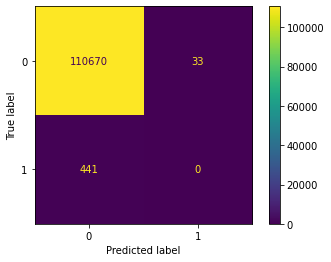

In [53]:
plot_confusion_matrix(log_reg, X_test, y_test)

In [60]:
y_test.value_counts()

0    110703
1       441
Name: is_fraud, dtype: int64

In [69]:
pd.DataFrame(pred).value_counts()

0    111111
1        33
dtype: int64

# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

In [89]:
pred_p = log_reg.predict_proba(X_train)

In [90]:
results = pd.DataFrame(pred_p)

In [91]:
results['thresh'] = np.nan
results['prediction'] = np.nan

In [92]:
results.rename({0:'not_fraud', 1:'fraud'}, axis =1, inplace= True)

In [97]:
results['true'] = y_train.values

In [98]:
results.head(2)

,not_fraud,fraud,thresh,prediction,true
0,0.997476,0.002524,0.5,0,0
1,0.998734,0.001266,0.5,0,0


In [99]:
result = pd.DataFrame(columns=['thresh', 'false_positive_rate'])

for i in np.linspace(0.5,1,150):
  results['thresh'] = i
  results['prediction'] = np.where(results['fraud']>results['thresh'],1,0)
  matrix = confusion_matrix(results['true'], results['prediction'])
  FP = matrix[0,1]
  TN = matrix[0,0]
  false_positive_rate = (FP/(TN+FP))
  temp = {'thresh': i, 'false_positive_rate': false_positive_rate}
  result = result.append(temp, ignore_index=True)


In [102]:
result[result['false_positive_rate']<0.05].sort_values('false_positive_rate', ascending = False )

,thresh,false_positive_rate
0,0.500000,0.000291
1,0.503356,0.000291
2,0.506711,0.000287
3,0.510067,0.000287
4,0.513423,0.000285
...,...,...
145,0.986577,0.000068
146,0.989933,0.000063
147,0.993289,0.000056
148,0.996644,0.000052


# 7.) If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [122]:
original_data = pd.DataFrame(log_reg.predict_proba(X))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [124]:
original_data.rename({0:'not_fraud', 1:'fraud'}, axis =1, inplace = True)

In [126]:
original_data['pred'] = np.where(original_data['fraud']>original_data['not_fraud'],1,0)

In [127]:
original_data.head(2)

,not_fraud,fraud,pred
0,1.0,0.000000e+00,0
1,1.0,1.242472e-12,0


In [149]:
def revenue(pred, true, trans, fee):
  if pred == true:
    return trans*fee

  else:
    return trans*-1


In [150]:
np.vectorize(revenue)(original_data['pred'], y, X['amt'], 0.02).sum()

-6213848.991200001

In [ ]:
revenue = -1
commission = 0.02

while revenue < 0:
  for fee in np.linspace(0.02,0.5, 100):
    revenue = np.vectorize(revenue)(original_data['pred'], y, X['amt'], fee).sum()
    
else:
  print(f'revenue now is positive {revenue} with a commission of {fee}')

# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [154]:
logistic_lasso = LogisticRegression("l2")

In [ ]:
# If most or all your variables go to 0 => Your data is garbage
# The regularization will tell us if our model has significance
# This of using coefficient strength similar to r^2

In [155]:
lasso_model = logistic_lasso.fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


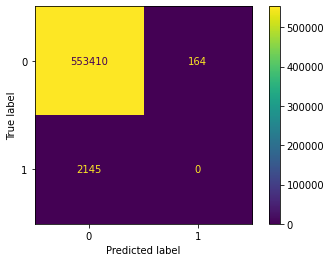

In [156]:
plot_confusion_matrix(lasso_model, X, y)

I do not trust the features as the model can't predict any of the true fraud cases